In [2]:
import pandas as pd
import numpy as np
from LabData.DataLoaders.ItamarSleepLoader import ItamarSleepLoader

study_ids = [10, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008]

bm =ItamarSleepLoader().get_data(study_ids=study_ids)
df = bm.df

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

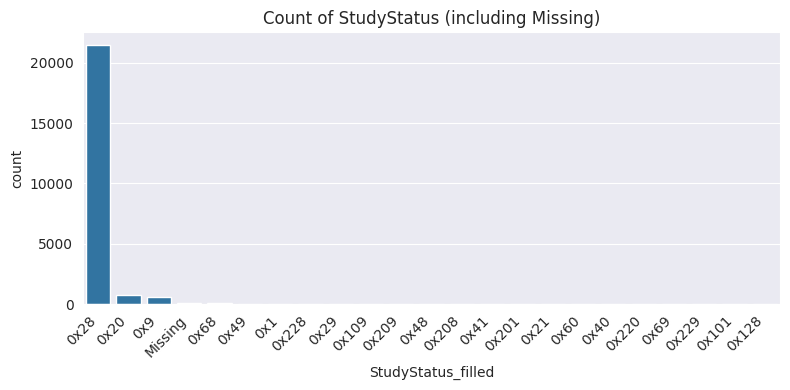

In [4]:
# 1) Fill NaN with "Missing"
df["StudyStatus_filled"] = df["StudyStatus"].fillna("Missing")

# 2) Build an ordered list of statuses that actually occur
status_counts = df["StudyStatus_filled"].value_counts()
valid_statuses = status_counts[status_counts > 0].index  # or .keys()

# 3) Plot, restricting to valid categories and rotating labels
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="StudyStatus_filled", order=valid_statuses)
plt.xticks(rotation=45, ha="right")
plt.title("Count of StudyStatus (including Missing)")
plt.tight_layout()
plt.show()


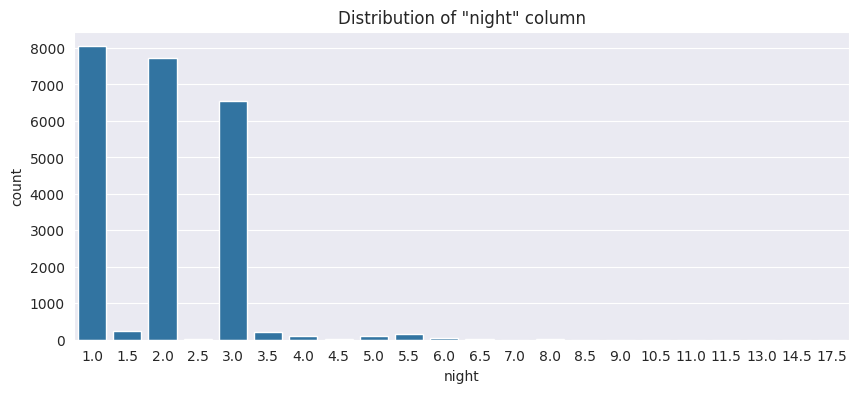

In [5]:
# In [3]:  Distribution of nights
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='night')
plt.title('Distribution of "night" column')
plt.show()


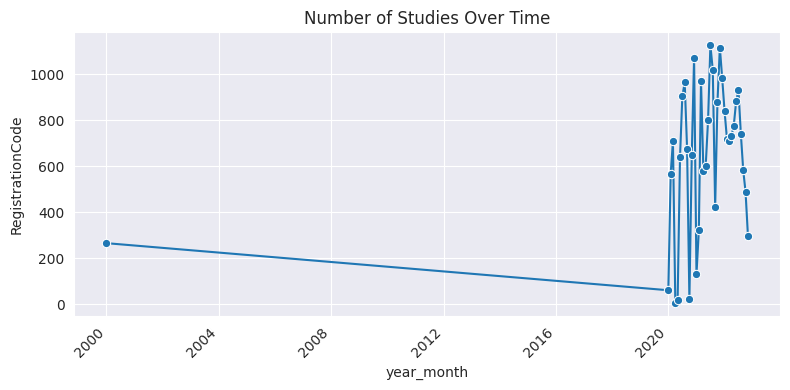

In [6]:
# In [4]:  Studies over time (line plot by month)
# First convert Date to datetime, if not already
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert to period and then to timestamp (representing the first day of the month)
df['year_month'] = df['Date'].dt.to_period('M').dt.to_timestamp()

# Group by the new column and count the number of RegistrationCode entries per month
counts = df.groupby('year_month')['RegistrationCode'].count().reset_index()

# Plot the lineplot with proper rotation for clarity
plt.figure(figsize=(8,4))
sns.lineplot(data=counts, x='year_month', y='RegistrationCode', marker='o')
plt.xticks(rotation=45, ha="right")
plt.title('Number of Studies Over Time')
plt.tight_layout()
plt.show()


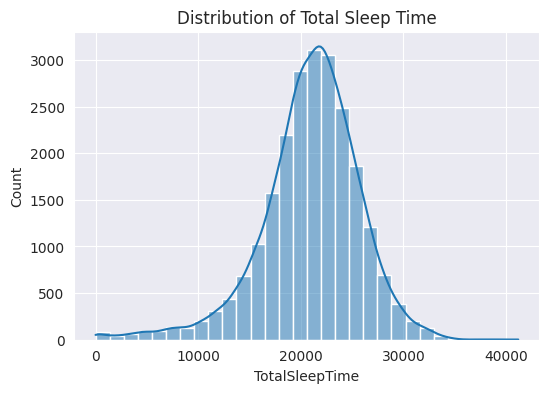

In [7]:
# In [5]:  Histogram of TotalSleepTime
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='TotalSleepTime', bins=30, kde=True)
plt.title('Distribution of Total Sleep Time')
plt.show()


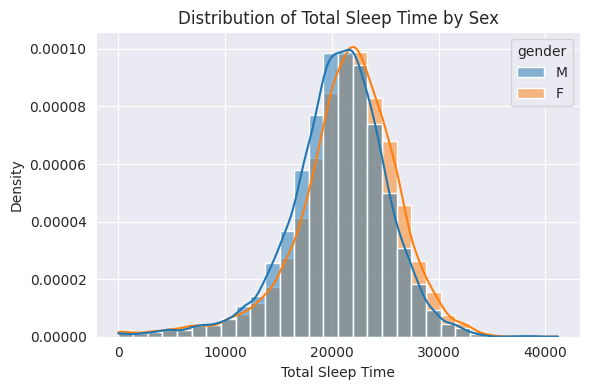

In [8]:
metadata = bm.df_metadata
metadata = metadata.reset_index()
id_gender = metadata[['RegistrationCode', 'Date', 'gender','StudyTypeID']]
# Merge the gender information into df on 'RegistrationCode'
df = df.merge(id_gender[['RegistrationCode', 'gender']], on='RegistrationCode', how='left')
# Or after merging
df['gender'] = df['gender'].map({1.0: 'M', 0.0: 'F'})

plt.figure(figsize=(6,4))
sns.histplot(
    data=df,
    x='TotalSleepTime',
    bins=30,
    kde=True,
    hue='gender',       # adjust the column name if needed (e.g. 'Gender')
    stat='density',  # normalize each histogram to density
    common_norm=False  # normalize each group separately
)
plt.title('Distribution of Total Sleep Time by Sex')
plt.xlabel('Total Sleep Time')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


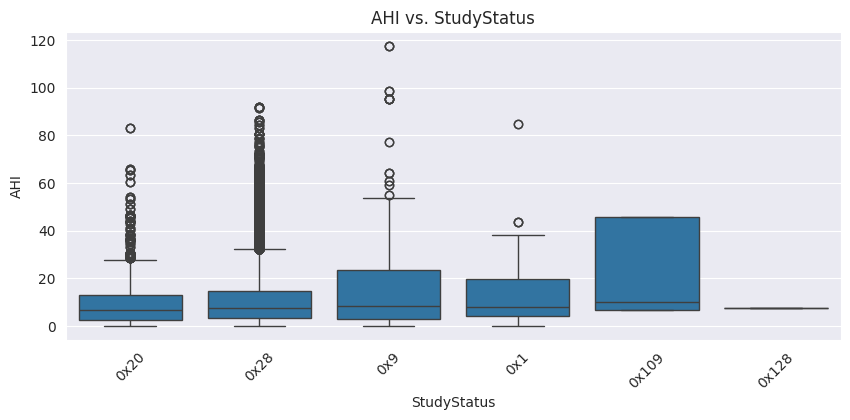

In [12]:
# In [6]:  Boxplot of AHI grouped by StudyStatus
# Filter StudyStatus values that have AHI data points
valid_statuses = df.groupby('StudyStatus')['AHI'].count()
valid_statuses = valid_statuses[valid_statuses > 0].index

# Plot only the valid statuses
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[df['StudyStatus'].isin(valid_statuses)], x='StudyStatus', y='AHI')
plt.title('AHI vs. StudyStatus')
plt.xticks(rotation=45)  # Rotate for readability if needed
plt.show()



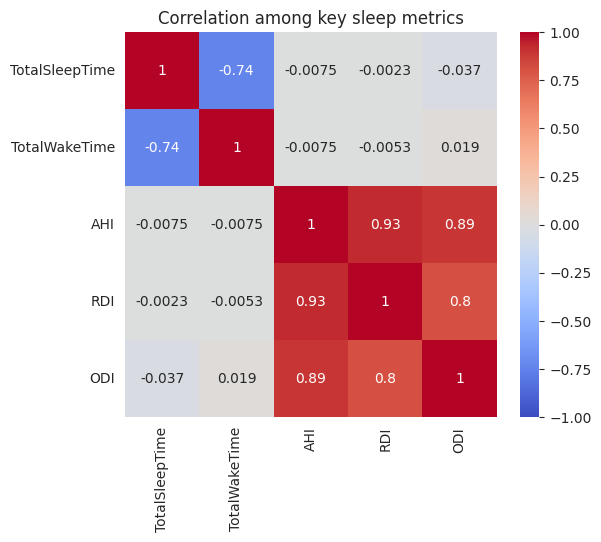

In [13]:
# In [7]:  Correlation heatmap of selected numeric columns
plt.figure(figsize=(6,5))
cols_of_interest = ['TotalSleepTime','TotalWakeTime','AHI','RDI','ODI']
corr = df[cols_of_interest].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation among key sleep metrics')
plt.show()
okok